In [21]:
!pip install luwiji

  Using cached luwiji-1.1.8.tar.gz (40.3 MB)
  Using cached jcopml-1.1.10.tar.gz (20 kB)
  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached scikit_optimize-0.8.1-py2.py3-none-any.whl (101 kB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached pyaml-20.4.0-py2.py3-none-any.whl (17 kB)
  Created wheel for luwiji: filename=luwiji-1.1.8-py2.py3-none-any.whl size=40371109 sha256=131561091b0929b98393ec01529b9ebc7d52635163f15d15202a683d91b4e460
  Stored in directory: c:\users\niken amelia\appdata\local\pip\cache\wheels\ef\7f\2e\02f0bac8de5f7c84db726d6cd207f8dbb7a53546deb29001d5
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=09c32e1afeb59d55a1db75901b8098731c8d8723300f6b2a3e68d044140c3495
  Stored in directory: c:\users\niken amelia\appdata\local\pip\cache\wheels\91\d3\74\d3613d4a835c894aff0212dad481e3f9466fb34e9f128a2612
Successfully built luwiji jcopml
  Attempting uninstall: decorator
    Found existing 

In [4]:
import os

import pandas as pd
from tqdm.auto import tqdm #untuk progress bar

from nltk.tokenize import word_tokenize
# !pip install -U gensim
from gensim.models import Word2Vec

In [22]:
from luwiji.word_vector import illustration

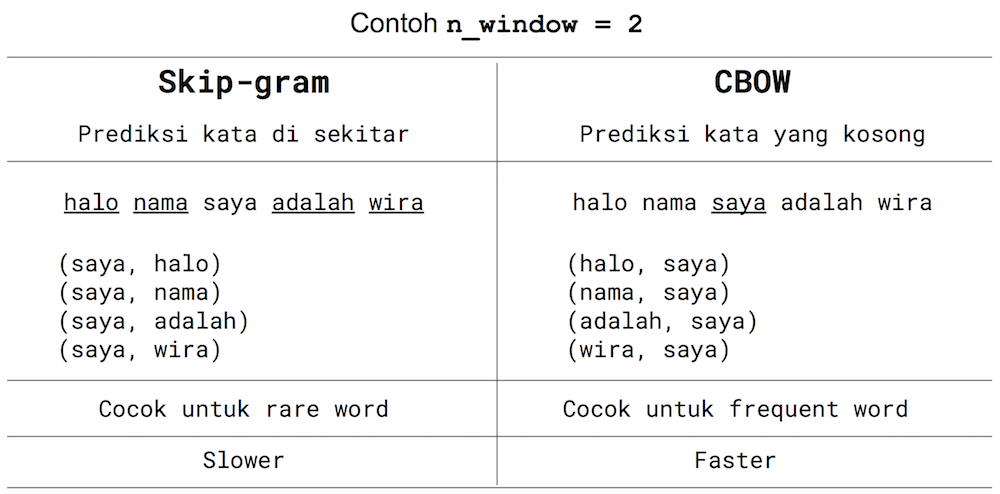

In [23]:
illustration.cbow_vs_skipgram

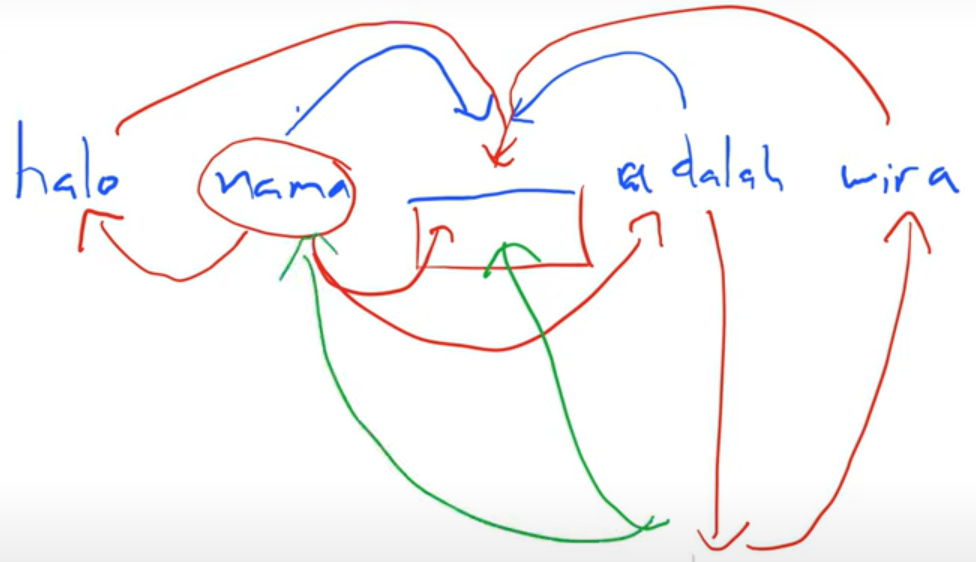

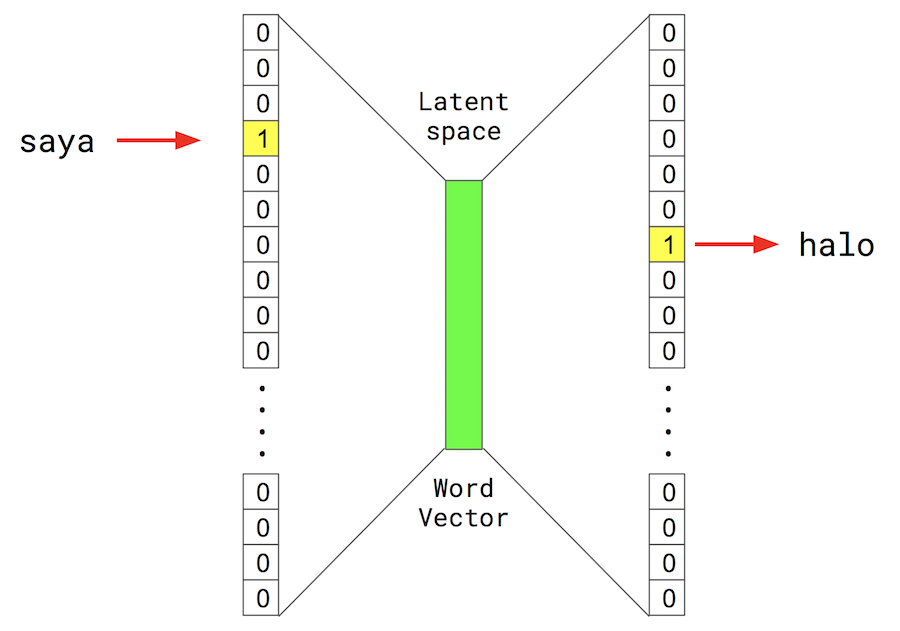

In [24]:
illustration.word2vec
#tidak pakai tf-idf atau bag of word
#kenapa bisa langsung tanpa memakai tf-idf/bow?
#karna itu kata bukan sentence jadi bisa langsung di one hot encoding
#kalau sentence bisa dijadikan bow

#one hot encoding kata SAYA lalu auto encoder tapi prediksi akhirnya harus
#softmax kata HALO (yang prediksinya tertinggi) (sama seperti contoh SKIP-GRAM)

#karna neuron lapisannya sudah banyak (probabilitinya banyak) makanya hasil 
# tidak efisien, oleh karena itu menggunakan logsoftmax

### Prepare Corpus

In [6]:
df = pd.read_csv("data/gojek_review.csv")
df.head()

review  rate
0  Sangat kecewa. Kecewa sekali. Udh top up. Mau ...     1
1  Ga niat ngasih promo sialan temen udh pake ref...     1
2  Kalau sistemnya rata begini apa bedanya yg raj...     1
3  Ongkosnya da mahal, minimal 16rb..... Sekarang...     1
4  Tolol anjing..!!!! Aplikasi yang katanga karya...     1

In [7]:
sentences = [word_tokenize(review.lower()) for review in tqdm(df.review)]
sentences[:5]

[['sangat',
  'kecewa',
  '.',
  'kecewa',
  'sekali',
  '.',
  'udh',
  'top',
  'up',
  '.',
  'mau',
  'di',
  'transaksi',
  'in',
  'malah',
  'kasih',
  'nomor',
  'yang',
  'salah',
  '.',
  'padahal',
  'nomor',
  'di',
  'profil',
  'benar',
  '.',
  'buat',
  'ap',
  'ah',
  'q',
  'top',
  'up',
  'tp',
  'ga',
  'bisa',
  'digunain',
  '.',
  'balikin.',
  '!',
  'ga',
  'becus',
  '.',
  'kasih',
  'nomer',
  'saalah',
  '.',
  'saya',
  'mau',
  'masukin',
  'kode',
  'transaksi',
  'gimana.',
  '!',
  '!',
  '!',
  '!'],
 ['ga',
  'niat',
  'ngasih',
  'promo',
  'sialan',
  'temen',
  'udh',
  'pake',
  'reff',
  'ga',
  'pake',
  'cara',
  'curang',
  'malah',
  'di',
  'stop',
  '.',
  'kapitalis',
  '.',
  'daerah',
  'ku',
  'ongkir',
  'ga',
  'ada',
  'subsidi',
  'di',
  'daerah',
  'lain',
  'masih',
  'ada',
  '.',
  'ampas',
  'gojek',
  'skrng',
  '.',
  'strategi',
  'baru',
  'ga',
  'bakar',
  'duit',
  'gimana',
  '.',
  'yg',
  'ada',
  'transaksi',
  'h

### Train Word2Vec Model

In [11]:
model = Word2Vec(sentences, size=128, window=5, min_count=3, workers=4, iter=1000, sg=0, hs=0)

### Save Model

In [12]:
os.makedirs("model/w2v/", exist_ok=True)

In [13]:
model.save("model/w2v/gojek_review.w2v")

### load

In [14]:
model = Word2Vec.load("model/w2v/gojek_review.w2v")

### Contonue training

In [15]:
contoh_data = [
    ['aplikasinya','ok','kok','.','sangat','membantu','untuk','keseharian','saya'],
    ['aplikasinya','gak','nyaman','dipakai','bule']
]

In [16]:
model.train(sentences, total_examples=len(sentences),epochs=100)

(3027286, 4580400)

In [17]:
model.save("model/w2v/gojek_review_pretrained.w2v")

### Model Information

cek model didalam gensim ada apa saja

In [18]:
w2v = model.wv

In [20]:
# untuk melihat semua vocab yang sudah di train
w2v.index2word

[',',
 '.',
 'saya',
 '!',
 'di',
 'gojek',
 'yg',
 'bisa',
 '?',
 'ada',
 'driver',
 'dan',
 'nya',
 'ini',
 'aplikasi',
 '...',
 'tidak',
 'yang',
 'gak',
 'mau',
 'ga',
 'lagi',
 'tolong',
 'sudah',
 'aja',
 'tapi',
 'untuk',
 'voucher',
 'padahal',
 'ke',
 'gopay',
 'sama',
 'udah',
 'akun',
 'sangat',
 'lebih',
 'dengan',
 'order',
 'ya',
 'buat',
 'jadi',
 'kenapa',
 'sekarang',
 'kasih',
 'malah',
 'lama',
 'gofood',
 'dari',
 'promo',
 'itu',
 'kalo',
 'pake',
 'dapat',
 'juga',
 'jauh',
 'karena',
 'masuk',
 'banyak',
 'apa',
 'kalau',
 'baru',
 'go',
 'dong',
 'kok',
 'gk',
 'terus',
 'kecewa',
 'harus',
 'selalu',
 'pakai',
 'pesan',
 'sistem',
 'makin',
 'orderan',
 'cuma',
 'hari',
 "''",
 'saldo',
 'tp',
 'anak',
 'banget',
 'atau',
 'dulu',
 'beli',
 'sekali',
 'sampai',
 'mohon',
 'sering',
 'makanan',
 'mahal',
 'setiap',
 'masih',
 'jangan',
 'grab',
 'pas',
 'baik',
 'kali',
 'drivernya',
 '1',
 'klo',
 '..',
 'perbaiki',
 'saja',
 'sy',
 'dapet',
 '(',
 'update',
 '

In [21]:
# untuk melihat semua vector hasil representasi setiap vocab atau kata (bentuknya)
# desimal seperti tf-idf dapat memahami juga jika setiap kata/vocab ada yang mirip.
# w2v include konteks/makna kata
w2v.vectors

array([[ 0.45072028, -0.77071863, -0.16248277, ...,  0.42994264,
         0.1799323 ,  0.36087352],
       [-0.54559314, -1.1210424 , -0.1759416 , ...,  0.9711327 ,
        -0.19240122,  0.07060161],
       [ 0.07391737, -0.35983303, -0.53555965, ...,  0.5711054 ,
         0.10678406, -0.0938035 ],
       ...,
       [-1.6121162 ,  0.5570095 ,  2.4983954 , ..., -1.5398943 ,
        -0.27304268,  2.960385  ],
       [-4.3362503 , -1.5679996 ,  0.58777696, ..., -3.3659544 ,
        -0.7414401 , -0.9064526 ],
       [ 0.28456882, -2.6354773 , -0.1684557 , ..., -3.2182193 ,
        -4.339011  ,  1.259742  ]], dtype=float32)

In [22]:
# w2v ada ukuran vektor/ukuran embeddingnya. data kecil/spesifik biasanya 100
w2v.vector_size

128

In [23]:
# bagaimana convert sebuah kata menjadi vektor?
# brntuknya mirip dictionary => menggunakan w2v.get_vector. setiap kali item kata
# yang dimasukkan, akan keluar vektornya
# atau bisa langsung seperti cara dibawah ini
w2v["ojol"]

array([-2.7423782 ,  1.1584233 ,  5.7254705 ,  4.8913746 , -1.5619644 ,
       -1.4890571 ,  0.9077132 ,  3.8273785 ,  0.56480604,  4.7591753 ,
       -3.4504066 , -1.9100186 ,  3.320585  ,  2.4118714 , -1.9619669 ,
       -7.3255353 ,  3.9117079 ,  0.95821434, -2.5952485 ,  1.0722874 ,
       -0.07215734, -2.7651534 ,  2.342453  ,  1.0056332 , -4.356     ,
       -4.134539  , -1.0269213 , -0.63453704,  3.8490565 ,  0.57596517,
       -2.5629444 , -0.15831038,  3.834572  ,  3.689281  , -0.60097945,
        1.4498284 ,  0.8445115 ,  0.8213769 , -0.95704406,  0.5782819 ,
        2.8136601 ,  3.317488  ,  3.8633025 , -0.456901  , -5.6596365 ,
        0.9730212 , -1.869283  , -3.8500507 , -0.7982315 ,  1.7923445 ,
        4.077261  ,  5.2676578 ,  1.1368419 , -2.7951498 ,  4.3441067 ,
        0.02628926,  0.90097517,  2.6346958 ,  0.7017497 ,  1.242892  ,
        1.3752257 , -3.26928   , -3.7560506 ,  1.0963378 ,  0.27527285,
        0.8199629 , -0.76634496,  1.2176001 ,  0.08982563,  4.60

### Sanity Check

check apakah language model sudah ada maknanya atau belum atau harus ditraining lebih lama lagi

=>ada 2 cara pendekatan
1. similar word => digunakan pada recomendations system (dibahas di materi unstruktur data)
= sudah jadi vektor, vektor seperti finger print, bisa dijadikan dokumen serach atau search engine. sekarang search engine tapi bukan document search yaitu word search

misal, dimasukkan kata A, kata A harusnya mirip dengan kata apa secara vektornya

2. higher order visualization menggunakan TSNE (dibahas di unsupervised learning) 
= untuk visualize word vector dengan cara reduce sampai tinggal 2 dimensi trs diplot dengan harapan plot ada maknanya (plot jangan pakai pca atau nmf), pakai yang memang di desain visualisasi (seperti yang sudah dipelajari di course 7)

#### 1. Similar word
kata yang dimasukkan akan otomatis to vec (menjadi vektor), baru dari vektor dia akan search di semua vocabulary kita, mana 5 vektor teratas yang paling mirip dengan kata yang dimasukkan

In [24]:
w2v.similar_by_word("gojek", topn=5)

#disini mirip bukan dalam arti mirip, tapi ini sesuai dengan yang 
#sudah di training sebelumnya. training untuk mengenal kata2 sekitarnya,
#sehingga yang muncul disini bukan mirip, tapi lebih ke secara semantik,
#misalnya pria dengan raja=secara semantik ada hubungannya
#wanita dengan ratu juga sama aja

#itu yang terjadi dibalik layar word2vec
#jadi similarnya itu, diantara kata2 yang sering munculnya bareng
#ada hubungannya

#kelemahan language model didataset yang kecil, ada vocab yang tidak ke cover 
#jadi tidak bisa dijadikan vector

[('go-jek', 0.3524430990219116),
 ('bekerja', 0.27282392978668213),
 ('ini', 0.27145251631736755),
 ('gi', 0.24087949097156525),
 ('.', 0.23685823380947113)]

### UMAP
#### 2. higher order visualization
sudah dibahas sedikit di kelas unsupervised learning bagian visualisasi

In [1]:
# from sklearn.manifold import TSNE #ini sudah dibahas di kelas unsupervised learning bagian visualisasi
#TSNE untuk data yang gede kurang cocok karena runningnya kelamaan, pelan

import numba
#biasanya menggunakan UMAP

from umap import UMAP
#untuk data yang gede bisa lebih fast dan untuk visualisasi lebih fleksibilitas bisa diatur2
#cara pakainya sama seperti sckit learn

#tools untuk plotting
import plotly.express as px

import numpy as np
import pandas as pd

In [2]:
numba.__version__

'0.53.1'

In [25]:
# visualisasi vektor, cara pakai umap sama kaya scikit learn
# yang mau ditransform apa? apa data yang mau di reduce jadi 2 dimensi =
# ingin menganalisa latent space nya (vektor), karna setelah di kompres ingin lihat 
# ada maknanya atau ga, jadi yang ingin di transform itu vektornya
# vektornya yang coba ingin divisualisasikan

# UMAP lumayan kenceng
X = UMAP().fit_transform(w2v.vectors)

In [27]:
df = pd.DataFrame(X, columns=["umap1","umap2"])
df["text"] = w2v.index2word

In [29]:
# setelah di reduce menjadi 2 dimensi maka ada umap 1 dan umap 2, 
# tinggal 2 nilai, umap1 dan 2 untuk text apa? karna mula2 misal tanda koma vektornya ada 300
# kemudian di reduce sampai tinggal 2, nah 2 ini yang ingin di plot dan ditandain kata apa saja.
# di plotly enak tinggal ditambahin aja text="text" untuk melihat text apa yang ingin ditampilin
df

umap1     umap2     text
0     2.295781  8.001621        ,
1     2.012650  6.835978        .
2     2.209379  6.031310     saya
3     0.552938  6.541247        !
4     0.554556  7.132650       di
...        ...       ...      ...
1688  2.586133  5.691893  ngilang
1689  0.391292  8.018168  referal
1690  2.026701  6.153110  ngutang
1691  2.289172  7.207501   daging
1692  2.444756  6.517765    sayaa

[1693 rows x 3 columns]

In [28]:
# untuk plotting dengan plotly
fig = px.scatter(df, x="umap1", y="umap2", text="text")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Reduced Word2Vec Visualization'
)
fig.show()

In [ ]:
# bow = kalimat